In [1]:
%pylab inline

# Import our plot library
from vplot import *

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib.patches import Polygon
import scipy.stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns;
sns.set(style="white", color_codes=True)

DATADIR="/storage/mgymrek/ssc-imputation/"
OUTPATH="pdfs/"
PREFIX="Figure4"

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gen_qq(pval1, pval2=[], outputFileName=None, marker='.', color1='red', label1='_nolegend_', xlabel="Expected Values (-log10)", ylabel="Observed Values (-log10)", xlim=None, ylim=None, xticksFormat=None, yticksFormat=None, diagonal=False, lr=False, legend=False, alpha=None, empty=False):   
    fig = plt.figure()
    ax=fig.add_subplot(111)
    
    Y = -1*np.log10(np.sort(pval1))
    X = -1*np.log10(1.0*np.array(range(len(Y)))/len(Y))
    
    if empty is True:
        X = [np.min(X), np.max(X)]
        Y = [np.min(Y), np.max(Y)]
    
    ax.scatter(X, Y, marker=marker, color=color1, label=label1, alpha=alpha)
    
    if len(pval2) > 0:
        for pval2_values in pval2:
            Y_2 = -1*np.log10(np.sort(pval2_values[0]))
            X_2 = -1*np.log10(1.0*np.array(range(len(Y_2)))/len(Y_2))
            ax.scatter(X_2, Y_2, marker=marker, color=pval2_values[1], label=pval2_values[2], alpha=alpha)
        
        
    ax.set_xlabel(xlabel, size=15)
    ax.set_ylabel(ylabel, size=15)

    if diagonal is True:
        ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle="dashed", color="black", label="_nolegend_")
    
    if xlim is not None:
        ax.set_xlim(xlim)
        
    if ylim is not None:
        ax.set_ylim(ylim)
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    if lr is True:
        m,b=np.polyfit(X, Y, 1)
        X_plot=np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
        ax.plot(X_plot, m*X_plot+b, linestyle="dashed", color="blue", label="Best fit")

    ax.set_xticklabels(ax.get_xticks(), size=12);
    ax.set_yticklabels(ax.get_yticks(), size=12);
    
    if xticksFormat is not None:
        ax.set_xticklabels([xticksFormat%(x) for x in ax.get_xticks()], size=10);
    if yticksFormat is not None:
        ax.set_yticklabels([yticksFormat%(x) for x in ax.get_yticks()], size=12);
    
    if legend is True:
        legend = ax.legend(loc="best")
        
    if outputFileName is not None:
        fig.savefig(os.path.join(OUTPATH, outputFileName))

In [3]:
chrom="21"
TISSUE = "WholeBlood"

# Conversion files
raw_values_id_to_pos = pd.read_csv("/storage/s1saini/manuscript_strsnp/gtex/chr"+chrom+"_pos_to_id_raw.txt", names=['str.start','str.id'], delim_whitespace=True)
imputed_values_id_to_pos = pd.read_csv("/storage/s1saini/manuscript_strsnp/gtex/chr"+chrom+"_pos_to_id_imputed.txt", names=['str.start','str.id'], delim_whitespace=True)

raw_values = pd.read_csv("/storage/mgymrek/ssc-imputation/gtex-power/hipstr_gtex_strgts_chr21_linreg_%s.tab"%TISSUE, delimiter="\t").drop(['str.id'], axis=1)
raw_values = pd.merge(raw_values, raw_values_id_to_pos, on="str.start", how="inner")

imputed_values = pd.read_csv("/storage/mgymrek/ssc-imputation/gtex-power/imputed_gtex_strgts_chr21_linreg_%s.tab"%TISSUE, sep="\t")
imputed_values = pd.merge(imputed_values, imputed_values_id_to_pos, on="str.start", how="inner")
imputed_values["str.id"] = imputed_values["str.id_y"]

In [7]:
print(intersection_raw_values.shape[0])
print(intersection_imputed_values.shape[0])

2452
2452


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


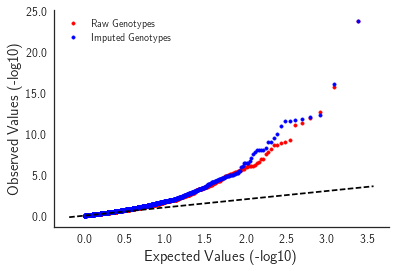

In [4]:
# Figure 3D: QQ plot
intersection_raw_values = raw_values[raw_values['str.id'].isin(imputed_values['str.id'].values.tolist())]
intersection_imputed_values = imputed_values[imputed_values['str.id'].isin(raw_values['str.id'].values.tolist())]
gen_qq(intersection_raw_values['p.wald'].values, [(intersection_imputed_values['p.wald'].values, "blue", "Imputed Genotypes")], label1 = "Raw Genotypes", legend = True, \
       diagonal=True, marker=".", outputFileName="%s_GTExQQ.pdf"%PREFIX)

In [12]:
DATADIR="/storage/s1saini/manuscript_strsnp/fig3/ssc-imputation/"
sscloo = pd.read_csv(os.path.join(DATADIR, "loo","l1o.ALL.chr.csv")).drop(['pos'], axis=1).drop_duplicates(subset=['str'])
sscloo["loo_r2"] = sscloo["loo_r"]**2
sscloo["wgs_eur_r2"] = sscloo["wgs_eur_r"]**2
id_start = pd.read_csv(os.path.join(DATADIR, "loo", "ALL.START_ID.txt"), delim_whitespace=True, names=["str","pos"]).drop_duplicates(subset=['pos'])
position_to_id = pd.read_csv("/storage/s1saini/manuscript_strsnp/fig3/position_to_id/ALL.position_to_id.txt", names=["pos", "str"], delim_whitespace=True)
sscloo = pd.merge(sscloo[["str","loo_concordance","wgs_eur_concordance","wgs_eur_r2", "loo_r2","loo_r"]], id_start, on=["str"])

In [10]:
# compare to NG
NGESTR = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/2016_estrs_table.csv',sep=',')
NGESTR["str.start"] = NGESTR["str.start"]-1
NGESTR["gene2"] = NGESTR["gene"]
imputed_values["gene2"] = imputed_values["gene"].apply(lambda x: x.split(".")[0])
vsng = pd.merge(imputed_values, NGESTR, on=["gene2","str.start"])
vsng = vsng[vsng["signif.estr"]]

97
(0.988485408261926, 1.0138659379831835e-79) 97
(0.7856840697804396, 0.00415230350567912) 11


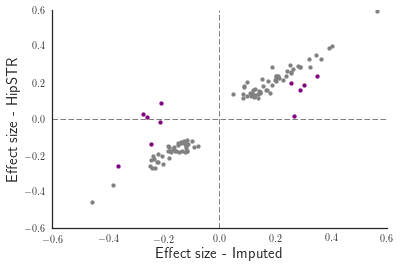

In [13]:
# Figure 3: Effect sizes for significant ones
min_col = 'p.wald'
MINVAL = 0.05

sig_raw_values = raw_values[raw_values[min_col] < MINVAL].reset_index()
sig_raw_values = sig_raw_values.iloc[sig_raw_values.groupby('gene').agg({min_col:'idxmin'})[min_col]]#[['gene','str.id', 'beta', min_col]]

# Merge, "_x" gives hipstr, "_y" gives imputed, only look at significant ones
imputed_raw = pd.merge(sig_raw_values, imputed_values, how="inner", on=['gene','str.id'])
imputed_raw["pos"] = imputed_raw.apply(lambda x: x["chrom_x"].replace("chr","")+":"+str(x["str.start_x"]), 1)
imputed_raw = pd.merge(imputed_raw, sscloo, on=["pos"])

# How many significant eSTRs also had imputed data
print(imputed_raw.shape[0])

def GetColor(x):
    return ["gray","red"][int(np.sign(x["beta_x"])==np.sign(x["beta_y"]))]

sizes = 15

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(imputed_raw['beta_y'], imputed_raw['beta_x'], color="gray", s=sizes) #imputed_raw.apply(GetColor, 1)
ax.scatter(vsng["beta_y"], vsng['beta_x'], color="purple", s=sizes) #imputed_raw.apply(GetColor, 1)

ax.axhline(y=0, linestyle="dashed", color="gray", linewidth=1)
ax.axvline(x=0, linestyle="dashed", color="gray", linewidth=1)
#ax.plot([-0.5,0.5],[-0.5,0.5], linestyle="dashed", color="gray")
ax.set_xlim(left=-0.6, right=0.6)
ax.set_ylim(bottom=-0.6, top=0.6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("Effect size - Imputed", size=15)
ax.set_ylabel("Effect size - HipSTR", size=15);
fig.savefig(os.path.join(OUTPATH, "%s_GTExEffectSizes.pdf"%PREFIX))

print(str(scipy.stats.pearsonr(imputed_raw['beta_x'], imputed_raw['beta_y']))+" " + str(imputed_raw.shape[0]))
print(str(scipy.stats.pearsonr(vsng["beta_y"], vsng['beta_x']))+" " + str(vsng.shape[0]))

In [14]:
# Fine-mapping analysis
finemap = pd.read_csv("/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/%s/Master.table"%TISSUE, sep="\t")
finemap["pos"]=finemap.apply(lambda x: x["chrom"].replace("chr","")+":"+str(x["str.start"]), 1)
finemap = pd.merge(imputed_raw, finemap, on=["pos","gene"])

In [16]:
# how many have anova<0.05 and top variant?
causal = finemap[(finemap["top.variant"].apply(lambda x: "SNP_" not in x))][["gene","pos","anova_pval","str.start_x","caviar.score","top.variant"]].sort_values("caviar.score", ascending=False)
causal["str.start"] = causal["str.start_x"]
causal
#finemap.sort_values("caviar.score", ascending=False)[["gene","str.start_x","caviar.score"]].

,gene,pos,anova_pval,str.start_x,caviar.score,top.variant
23,ENSG00000157538.9,21:38733174,0.045781,38733174,0.353615,STR_38733174
51,ENSG00000160213.5,21:45196326,0.000007,45196326,0.153658,STR_45196326
90,ENSG00000205929.5,21:34133199,0.006485,34133199,0.093881,STR_34133199
8,ENSG00000142207.5,21:33716191,0.269995,33716191,0.060028,STR_33716191
13,ENSG00000154719.9,21:26948798,0.089460,26948798,0.049304,STR_26948798
21,ENSG00000156299.8,21:32861320,0.027934,32861320,0.049094,STR_32894050
25,ENSG00000157551.13,21:39609872,0.092579,39609872,0.045979,STR_39609872
86,ENSG00000197381.11,21:46608529,0.896975,46608529,0.028083,STR_46608529
53,ENSG00000160216.14,21:45268137,NaN,45268137,0.023171,STR_45268137


In [37]:
#pd.merge(intersection_raw_values, causal, on=["gene","str.start"]).sort_values("caviar.score", ascending=False)
causal["str.id_x"] = causal.apply(lambda x: "STR_%s"%x["str.start"], 1)
pd.merge(intersection_imputed_values[["gene","p.wald"]].groupby("gene", as_index=False).agg({"p.wald":min}), causal, on=["gene"]).sort_values("caviar.score", ascending=False)

,gene,p.wald,pos,anova_pval,str.start_x,caviar.score,top.variant,str.start,str.id,str.id_x
3,ENSG00000157538.9,5.006813e-05,21:38733174,0.045781,38733174,0.353615,STR_38733174,38733174,38733174,STR_38733174
5,ENSG00000160213.5,5.907734e-13,21:45196326,0.000007,45196326,0.153658,STR_45196326,45196326,45196326,STR_45196326
8,ENSG00000205929.5,2.852039e-01,21:34133199,0.006485,34133199,0.093881,STR_34133199,34133199,34133199,STR_34133199
0,ENSG00000142207.5,1.009642e-05,21:33716191,0.269995,33716191,0.060028,STR_33716191,33716191,33716191,STR_33716191
1,ENSG00000154719.9,3.974107e-02,21:26948798,0.089460,26948798,0.049304,STR_26948798,26948798,26948798,STR_26948798
2,ENSG00000156299.8,2.385833e-05,21:32861320,0.027934,32861320,0.049094,STR_32894050,32861320,32861320,STR_32861320
4,ENSG00000157551.13,1.754032e-08,21:39609872,0.092579,39609872,0.045979,STR_39609872,39609872,39609872,STR_39609872
7,ENSG00000197381.11,1.658961e-02,21:46608529,0.896975,46608529,0.028083,STR_46608529,46608529,46608529,STR_46608529
6,ENSG00000160216.14,3.884022e-03,21:45268137,NaN,45268137,0.023171,STR_45268137,45268137,45268137,STR_45268137


In [30]:
pd.merge(intersection_imputed_values, causal, on=["gene","str.id_x"])

,gene,chrom,str.id_x,str.start_x,n.miss,allele1.dummy,allele2.dummy,af.dummy,beta,beta.se,...,p.wald,str.id_y,str.id_x,pos,anova_pval,str.start_x,caviar.score,top.variant,str.start_y,str.id_y
0,ENSG00000156299.8,chr21,STR_32861320,32861320,1,A,G,0,0.243334,0.056665,...,0.000024,STR_878748,STR_878748,21:32861320,0.027934,32861320,0.049094,STR_32894050,32861320,32861320
1,ENSG00000142207.5,chr21,STR_33716191,33716191,0,A,G,0,0.251681,0.056444,...,0.000012,STR_879398,STR_879398,21:33716191,0.269995,33716191,0.060028,STR_33716191,33716191,33716191
2,ENSG00000205929.5,chr21,STR_34133199,34133199,4,A,G,0,0.047868,0.058655,...,0.415117,STR_879691,STR_879691,21:34133199,0.006485,34133199,0.093881,STR_34133199,34133199,34133199
3,ENSG00000157538.9,chr21,STR_38733174,38733174,1,A,G,0,-0.233821,0.056801,...,0.000050,STR_882735,STR_882735,21:38733174,0.045781,38733174,0.353615,STR_38733174,38733174,38733174
4,ENSG00000160216.14,chr21,STR_45268137,45268137,0,A,G,0,0.167351,0.057499,...,0.003884,STR_886316,STR_886316,21:45268137,NaN,45268137,0.023171,STR_45268137,45268137,45268137


In [25]:
intersection_imputed_values.head()

,gene,chrom,str.id_x,str.start,n.miss,allele1.dummy,allele2.dummy,af.dummy,beta,beta.se,lambda.remel,p.wald,str.id_y,str.id
0,ENSG00000185272.9,chr21,STR_15497315,15497315,0,A,G,0,-0.014982,0.058315,-1,0.797423,STR_869525,STR_869525
2,ENSG00000185272.9,chr21,STR_15513708,15513708,0,A,G,0,-0.010608,0.058318,-1,0.855791,STR_869535,STR_869535
3,ENSG00000185272.9,chr21,STR_15513949,15513949,0,A,G,0,-0.004816,0.058321,-1,0.934247,STR_869536,STR_869536
5,ENSG00000185272.9,chr21,STR_15535414,15535414,0,A,G,0,0.039339,0.058276,-1,0.500177,STR_869547,STR_869547
10,ENSG00000185272.9,chr21,STR_15569348,15569348,0,A,G,0,0.054002,0.058236,-1,0.354533,STR_869562,STR_869562


In [32]:
imputed_values[(imputed_values["gene"]=="ENSG00000160213.5") ].sort_values("p.wald")
#raw_values[(raw_values["gene"]=="ENSG00000157538.9") ].sort_values("p.wald")

,gene,chrom,str.id_x,str.start,n.miss,allele1.dummy,allele2.dummy,af.dummy,beta,beta.se,lambda.remel,p.wald,str.id_y,str.id,gene2
6111,ENSG00000160213.5,chr21,STR_45196321,45196321,2,A,G,0,0.403765,0.053538,-1,5.907734e-13,STR_886261,STR_886261,ENSG00000160213
6134,ENSG00000160213.5,chr21,STR_45240727,45240727,0,A,G,0,0.343929,0.054763,-1,1.212599e-09,STR_886286,STR_886286,ENSG00000160213
6138,ENSG00000160213.5,chr21,STR_45241378,45241378,1,A,G,0,-0.334167,0.055062,-1,3.976166e-09,STR_886287,STR_886287,ENSG00000160213
6158,ENSG00000160213.5,chr21,STR_45251746,45251746,0,A,G,0,-0.252704,0.056428,-1,1.077949e-05,STR_886297,STR_886297,ENSG00000160213
6154,ENSG00000160213.5,chr21,STR_45248832,45248832,0,A,G,0,-0.243075,0.056572,-1,2.358750e-05,STR_886295,STR_886295,ENSG00000160213
6121,ENSG00000160213.5,chr21,STR_45202408,45202408,0,A,G,0,-0.219430,0.056900,-1,1.413854e-04,STR_886267,STR_886267,ENSG00000160213
6093,ENSG00000160213.5,chr21,STR_45177857,45177857,1,A,G,0,-0.209568,0.057123,-1,2.895318e-04,STR_886251,STR_886251,ENSG00000160213
6097,ENSG00000160213.5,chr21,STR_45180046,45180046,0,A,G,0,-0.200694,0.057135,-1,5.133870e-04,STR_886252,STR_886252,ENSG00000160213
6101,ENSG00000160213.5,chr21,STR_45186088,45186088,2,A,G,0,0.183048,0.057532,-1,1.622005e-03,STR_886255,STR_886255,ENSG00000160213
6106,ENSG00000160213.5,chr21,STR_45192040,45192040,0,A,G,0,0.176802,0.057402,-1,2.265434e-03,STR_886259,STR_886259,ENSG00000160213


# Example loci

In [132]:
45196326-45201832

-5506

In [103]:
# CSTB
CHROM=21
START=45196326
GENE="ENSG00000160213.5"

TISSUES="WholeBlood"
t = "WholeBlood"

In [104]:
%%bash -s "$CHROM" "$START" "$TISSUES" "$GENE"

CHROM=$1
START=$2
TISSUES=$3
GENE=$4

VCF=/storage/szfeupe/Runs/650GTEx_estr/Merged_STRs_all_samples.vcf.gz 

# Pull out STR genotypes
bcftools query -r ${CHROM}:${START}-${START} -f"[%SAMPLE\t%GB\n]" $VCF | \
    grep -v "\." | sed 's/|/\t/' | awk '{print $1 "\t" $2+$3}' > str_genotypes.tab

# Pull out gene expression
for t in $(echo $TISSUES | sed 's/,/ /g')
do
    EXPR=/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${t}/Corr_Expr.csv
    colnum=$(cat $EXPR | head -n 1 | sed 's/,/\t/g' | datamash transpose | awk '{print NR "\t" $0}' | grep -w $GENE | cut -f 1)
    cat $EXPR | cut -d',' -f 1,$((${colnum}+1)) | grep -v ENSG > expr_${t}.tab
done

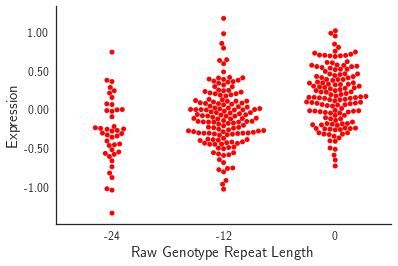

In [105]:
import seaborn as sns
strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))

rmgts = []
for gt in sorted(list(set(strgt["str"]))):
    if strgt[strgt["str"]==gt].shape[0] <3: rmgts.append(gt)
strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]

fig = plt.figure()
ax = fig.add_subplot(111)
expr = pd.read_csv("expr_%s.tab"%t, names=["sample","expr"])
data = pd.merge(strgt, expr)
sns.swarmplot(x="str", y="expr", ax=ax, data=data, color="red")
ax.set_xlabel("Raw Genotype Repeat Length", size=15)
ax.set_ylabel("Expression", size=15)
ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.suptitle("");
plt.show()
fig.savefig(os.path.join(OUTPATH, "%s_RawGT_vs_Expr_CSTB.pdf"%PREFIX))

In [106]:
%%bash -s "$CHROM" "$START" "$TISSUES" "$GENE"

CHROM=$1
START=$2
TISSUES=$3
GENE=$4

VCF=/storage/s1saini/manuscript_strsnp/gtex/gtex_beagle41_chr21_multiallelic.vcf.gz

# Pull out STR genotypes
bcftools query -r ${CHROM}:${START}-${START} -f"[%SAMPLE\t%REF\t%TGT\n]" $VCF | \
    grep -v "\." > str_genotypes.tab

# Pull out gene expression
for t in $(echo $TISSUES | sed 's/,/ /g')
do
    EXPR=/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${t}/Corr_Expr.csv
    colnum=$(cat $EXPR | head -n 1 | sed 's/,/\t/g' | datamash transpose | awk '{print NR "\t" $0}' | grep -w $GENE | cut -f 1)
    cat $EXPR | cut -d',' -f 1,$((${colnum}+1)) | grep -v ENSG > expr_${t}.tab
done

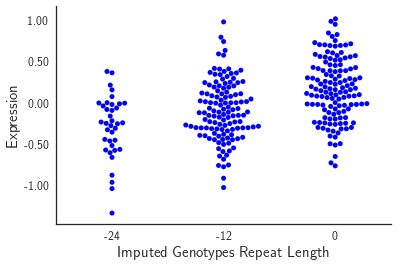

In [107]:
import re
strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","ref","str"])
strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))

sample_gt = list()
for i in strgt.values:
    refLen = len(i[1])
    gt_bases = re.split('/|\|',i[2])
    if ('.' in gt_bases):
        gt_bases_len = 'NA'
    else:
        gt_bases_len = np.sum([(len(j) - refLen) for j in gt_bases])
    sample_gt.append([i[0], gt_bases_len])
    
strgt = pd.DataFrame.from_records(sample_gt, columns=['sample','str'])

rmgts = []
for gt in sorted(list(set(strgt["str"]))):
    if strgt[strgt["str"]==gt].shape[0] <= 3: rmgts.append(gt)
strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]

fig = plt.figure()
ax = fig.add_subplot(111)
expr = pd.read_csv("expr_%s.tab"%t, names=["sample","expr"])
data = pd.merge(strgt, expr)
sns.swarmplot(x="str", y="expr", ax=ax, data=data, color="blue")
ax.set_xlabel("Imputed Genotypes Repeat Length", size=15)
ax.set_ylabel("Expression", size=15)
ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.set_title("chr%s:%s - %s"%(CHROM, START, GENE))
plt.suptitle("");
plt.show()
fig.savefig(os.path.join(OUTPATH, "%s_ImputedGT_vs_Expr_CSTB.pdf"%PREFIX))

In [129]:
CHROM=21
START=45201832

In [130]:
%%bash -s "$CHROM" "$START" "$TISSUES" "$GENE"

CHROM=$1
START=$2
TISSUES=$3
GENE=$4

VCF=/storage/s1saini/manuscript_strsnp/gtex/gtex_beagle41_chr21.vcf.gz

# Pull out STR genotypes
bcftools query -r ${CHROM}:${START}-${START} -f"[%SAMPLE\t%GT\n]" $VCF | \
    grep -v "\." | sed 's/|/\t/' | awk '{print $1 "\t" $2+$3}' > str_genotypes.tab

# Pull out gene expression
for t in $(echo $TISSUES | sed 's/,/ /g')
do
    EXPR=/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${t}/Corr_Expr.csv
    colnum=$(cat $EXPR | head -n 1 | sed 's/,/\t/g' | datamash transpose | awk '{print NR "\t" $0}' | grep -w $GENE | cut -f 1)
    cat $EXPR | cut -d',' -f 1,$((${colnum}+1)) | grep -v ENSG > expr_${t}.tab
done

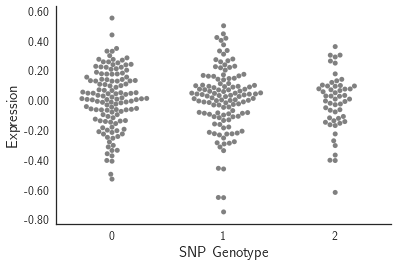

In [131]:
strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))


rmgts = []
for gt in sorted(list(set(strgt["str"]))):
    if strgt[strgt["str"]==gt].shape[0] <3: rmgts.append(gt)
strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]

fig = plt.figure()
ax = fig.add_subplot(111)
expr = pd.read_csv("expr_%s.tab"%t, names=["sample","expr"])
data = pd.merge(strgt, expr)
sns.swarmplot(x="str", y="expr", ax=ax, data=data, color="gray")
ax.set_xlabel("SNP Genotype", size=15)
ax.set_ylabel("Expression", size=15)
ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.set_title("chr%s:%s - %s"%(CHROM, START, GENE))
plt.suptitle("");
plt.show()
fig.savefig(os.path.join(OUTPATH, "%s_BestSNP_vs_Expr_CSTB.pdf"%PREFIX))

# another example

# Multi-allelic example 

In [111]:
CHROM=21
START=38733174
GENE="ENSG00000157538.9"
TISSUES="WholeBlood"

In [112]:
%%bash -s "$CHROM" "$START" "$TISSUES" "$GENE"

CHROM=$1
START=$2
TISSUES=$3
GENE=$4

VCF=/storage/szfeupe/Runs/650GTEx_estr/Merged_STRs_all_samples.vcf.gz 

# Pull out STR genotypes
bcftools query -r ${CHROM}:${START}-${START} -f"[%SAMPLE\t%GB\n]" $VCF | \
    grep -v "\." | sed 's/|/\t/' | awk '{print $1 "\t" $2+$3}' > str_genotypes.tab

# Pull out gene expression
for t in $(echo $TISSUES | sed 's/,/ /g')
do
    EXPR=/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${t}/Corr_Expr.csv
    colnum=$(cat $EXPR | head -n 1 | sed 's/,/\t/g' | datamash transpose | awk '{print NR "\t" $0}' | grep -w $GENE | cut -f 1)
    cat $EXPR | cut -d',' -f 1,$((${colnum}+1)) | grep -v ENSG > expr_${t}.tab
done

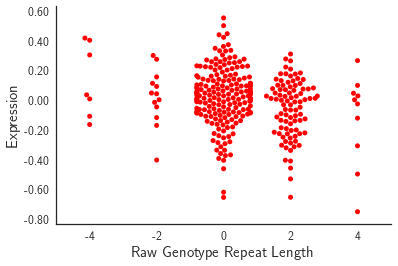

In [113]:
strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))

rmgts = []
for gt in sorted(list(set(strgt["str"]))):
    if strgt[strgt["str"]==gt].shape[0] <3: rmgts.append(gt)
strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]

t="WholeBlood"
fig = plt.figure()
ax = fig.add_subplot(111)
expr = pd.read_csv("expr_%s.tab"%t, names=["sample","expr"])
data = pd.merge(strgt, expr)
sns.swarmplot(x="str", y="expr", ax=ax, data=data, color="red")
ax.set_xlabel("Raw Genotype Repeat Length", size=15)
ax.set_ylabel("Expression", size=15)
ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.suptitle("");
plt.show()
fig.savefig(os.path.join(OUTPATH, "%s_RawGT_vs_Expr_Multi.pdf"%PREFIX))

In [114]:
%%bash -s "$CHROM" "$START" "$TISSUES" "$GENE"

CHROM=$1
START=$2
TISSUES=$3
GENE=$4

VCF=/storage/s1saini/manuscript_strsnp/gtex/gtex_beagle41_chr21_multiallelic.vcf.gz

# Pull out STR genotypes
bcftools query -r ${CHROM}:${START}-${START} -f"[%SAMPLE\t%REF\t%TGT\n]" $VCF | \
    grep -v "\." > str_genotypes.tab

# Pull out gene expression
for t in $(echo $TISSUES | sed 's/,/ /g')
do
    EXPR=/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${t}/Corr_Expr.csv
    colnum=$(cat $EXPR | head -n 1 | sed 's/,/\t/g' | datamash transpose | awk '{print NR "\t" $0}' | grep -w $GENE | cut -f 1)
    cat $EXPR | cut -d',' -f 1,$((${colnum}+1)) | grep -v ENSG > expr_${t}.tab
done

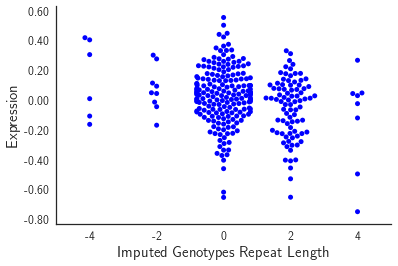

In [115]:
import re
strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","ref","str"])
strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))

sample_gt = list()
for i in strgt.values:
    refLen = len(i[1])
    gt_bases = re.split('/|\|',i[2])
    if ('.' in gt_bases):
        gt_bases_len = 'NA'
    else:
        gt_bases_len = np.sum([(len(j) - refLen) for j in gt_bases])
    sample_gt.append([i[0], gt_bases_len])
    
strgt = pd.DataFrame.from_records(sample_gt, columns=['sample','str'])

rmgts = []
for gt in sorted(list(set(strgt["str"]))):
    if strgt[strgt["str"]==gt].shape[0] <= 3: rmgts.append(gt)
strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]

t="WholeBlood"
fig = plt.figure()
ax = fig.add_subplot(111)
expr = pd.read_csv("expr_%s.tab"%t, names=["sample","expr"])
data = pd.merge(strgt, expr)
sns.swarmplot(x="str", y="expr", ax=ax, data=data, color="blue")
ax.set_xlabel("Imputed Genotypes Repeat Length", size=15)
ax.set_ylabel("Expression", size=15)
ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.set_title("chr%s:%s - %s"%(CHROM, START, GENE))
plt.suptitle("");
plt.show()
fig.savefig(os.path.join(OUTPATH, "%s_ImputedGT_vs_Expr_Multi.pdf"%PREFIX))

In [116]:
CHROM=21
START=38732581

In [117]:
%%bash -s "$CHROM" "$START" "$TISSUES" "$GENE"

CHROM=$1
START=$2
TISSUES=$3
GENE=$4

VCF=/storage/s1saini/manuscript_strsnp/gtex/gtex_beagle41_chr21.vcf.gz

# Pull out STR genotypes
bcftools query -r ${CHROM}:${START}-${START} -f"[%SAMPLE\t%GT\n]" $VCF | \
    grep -v "\." | sed 's/|/\t/' | awk '{print $1 "\t" $2+$3}' > str_genotypes.tab

# Pull out gene expression
for t in $(echo $TISSUES | sed 's/,/ /g')
do
    EXPR=/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${t}/Corr_Expr.csv
    colnum=$(cat $EXPR | head -n 1 | sed 's/,/\t/g' | datamash transpose | awk '{print NR "\t" $0}' | grep -w $GENE | cut -f 1)
    cat $EXPR | cut -d',' -f 1,$((${colnum}+1)) | grep -v ENSG > expr_${t}.tab
done

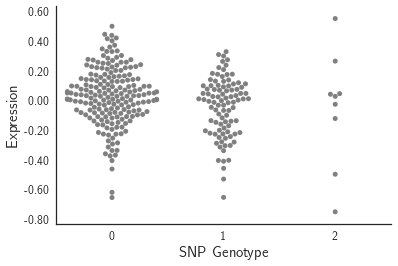

In [118]:
strgt = pd.read_csv("str_genotypes.tab", sep="\t", names=["sample","str"])
strgt["sample"] = strgt["sample"].apply(lambda x: "-".join(x.split("-")[0:2]))


rmgts = []
for gt in sorted(list(set(strgt["str"]))):
    if strgt[strgt["str"]==gt].shape[0] <3: rmgts.append(gt)
strgt = strgt[strgt["str"].apply(lambda x: x not in rmgts)]

t="WholeBlood"
fig = plt.figure()
ax = fig.add_subplot(111)
expr = pd.read_csv("expr_%s.tab"%t, names=["sample","expr"])
data = pd.merge(strgt, expr)
sns.swarmplot(x="str", y="expr", ax=ax, data=data, color="gray")
ax.set_xlabel("SNP Genotype", size=15)
ax.set_ylabel("Expression", size=15)
ax.set_xticklabels([int(item) for item in sorted(list(set(data["str"])))], size=12)
ax.set_yticklabels(["%.2f"%(item) for item in ax.get_yticks()], size=12)
ax.set_title("")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax.set_title("chr%s:%s - %s"%(CHROM, START, GENE))
plt.suptitle("");
plt.show()
fig.savefig(os.path.join(OUTPATH, "%s_BestSNPT_vs_Expr_Multi.pdf"%PREFIX))

In [135]:
38732581-38733174

-593